In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
os.listdir()

['.DS_Store',
 'Final_data.xlsx',
 'Final_data.csv',
 'Untitled.ipynb',
 'latestdata.csv',
 '.ipynb_checkpoints',
 'COVID-19_Mortality_Prediction.ipynb']

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
data = pd.read_excel('Final_data.xlsx')

In [7]:
data.head()

,age,sex,city,province,country,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,Seattle,Washington,United States,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,recovered
1,54.0,0,Taguig,Metro Manila,Philippines,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,recovered
2,40.0,0,Pasay,Metro Manila,Philippines,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,recovered
3,28.0,0,Muntinlupa,Metro Manila,Philippines,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,recovered
4,30.0,0,Cainta,Rizal,Philippines,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,recovered


In [8]:
data.columns

Index(['age', 'sex', 'city', 'province', 'country', 'chronic_disease_binary',
       'chronic_disease_Hypertension', 'chronic_disease_Diabetes',
       'chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma',
       'chronic_disease_cardiac', 'chronic_disease_prostate',
       'chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV',
       'chronic_disease_cereberal', 'chronic_disease_Parkinson',
       'chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain', 'chills',
       'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea', 'emesis',
       'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortnes

In [9]:
data.groupby('outcome').size()

outcome
died         6010
recovered    6010
dtype: int64

In [10]:
df = data[['age', 'sex',
       'chronic_disease_Hypertension', 'chronic_disease_Diabetes',
       'chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma',
       'chronic_disease_cardiac', 'chronic_disease_prostate',
       'chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV',
       'chronic_disease_cereberal', 'chronic_disease_Parkinson',
       'chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia','outcome']]

In [11]:
df.head()

,age,sex,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,chronic_disease_prostate,chronic_disease_cancer,chronic_disease_TB,chronic_disease_Hepatitis,chronic_disease_HIV,chronic_disease_cereberal,chronic_disease_Parkinson,chronic_disease_bronchitis,chronic_disease_hypothyroidism,chronic_disease_dyslipidemia,outcome
0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recovered
1,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recovered
2,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recovered
3,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recovered
4,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recovered


## Visualization

<AxesSubplot:xlabel='outcome', ylabel='count'>

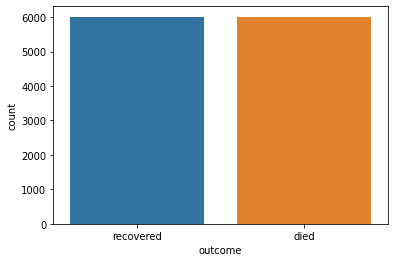

In [12]:
sns.countplot(x = 'outcome',data = df)

In [14]:
df.outcome.replace({'recovered':1},inplace = True)
df.outcome.replace({'died':0},inplace = True)

/Users/spandanatammineedi/Desktop/Anaconda/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## CORRELATION 

<AxesSubplot:>

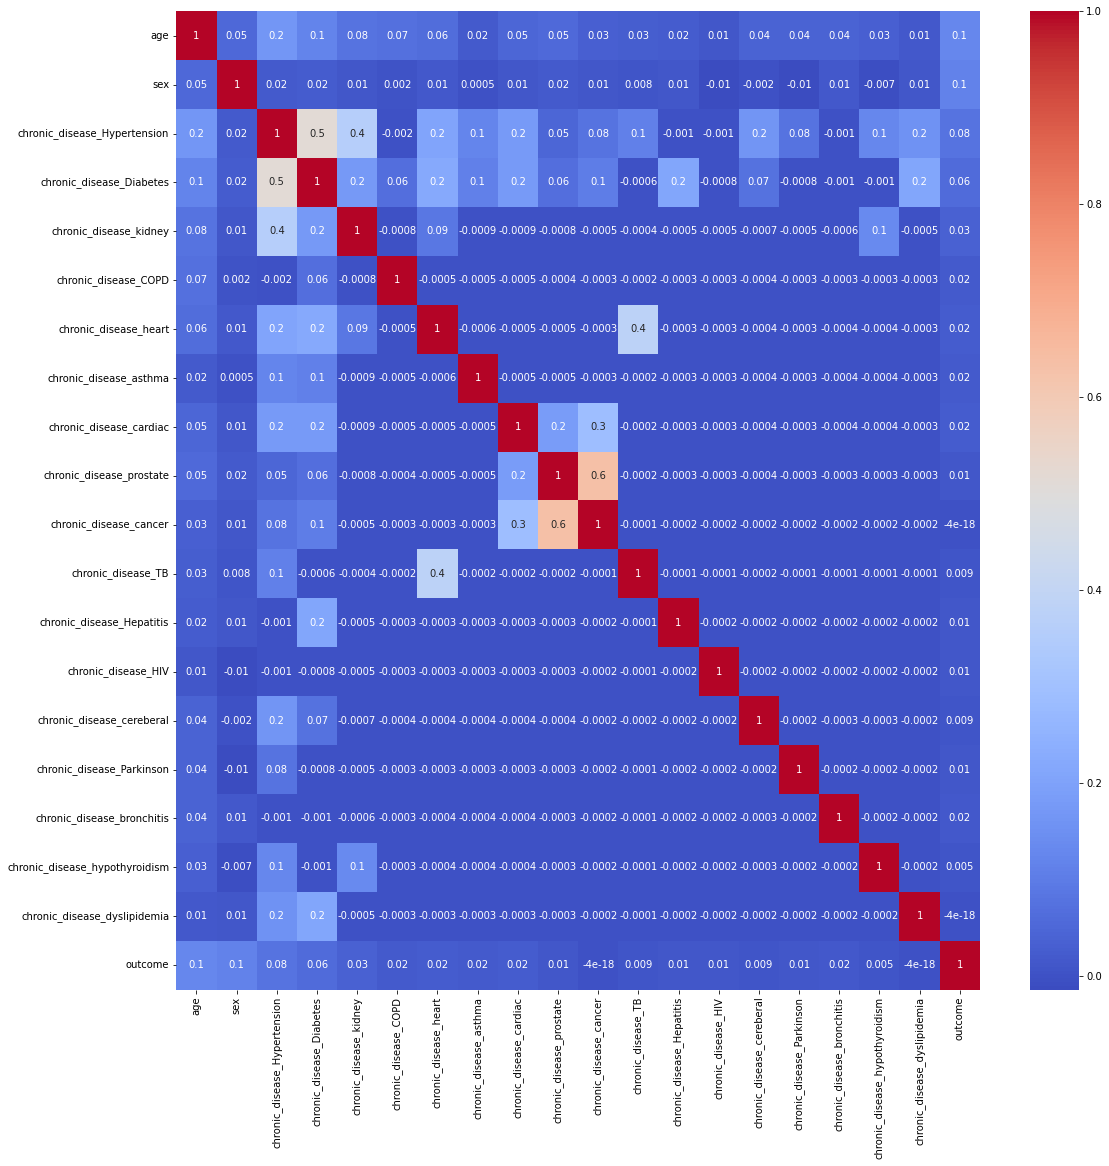

In [15]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

In [19]:
# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['Decision Tree Accuracy']=accuracy_score(y_test,DTpredictions)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy

{'Decision Tree Accuracy': 0.8660565723793677}

## NEURAL NETWORK

In [16]:
X = df.drop('outcome',axis = 1).values
y = df['outcome'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
X_train.shape

(8414, 19)

In [24]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [25]:
#MODEL1- 19,10,1 with drop out 0.5

In [26]:
model = Sequential()

model.add(Dense(19,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.5))
#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [27]:
model.fit(x = X_train,y= y_train,epochs = 500,validation_data = (X_test,y_test),callbacks = [early_stop])

2021-12-03 15:59:42.571777: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-03 15:59:42.573916: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8414 samples, validate on 3606 samples
Epoch 1/500
8414/8414 [==============================] - 2s 231us/sample - loss: 0.6913 - val_loss: 0.6885
Epoch 2/500
8414/8414 [==============================] - 1s 77us/sample - loss: 0.6896 - val_loss: 0.6881
Epoch 3/500
8414/8414 [==============================] - 1s 78us/sample - loss: 0.6857 - val_loss: 0.6839
Epoch 4/500
8414/8414 [==============================] - 1s 75us/sample - loss: 0.6762 - val_loss: 0.6626
Epoch 5/500
8414/8414 [==============================] - 1s 81us/sample - loss: 0.6489 - val_loss: 0.6147
Epoch 6/500
8414/8414 [==============================] - 1s 94us/sample - loss: 0.6054 - val_loss: 0.5559
Epoch 7/500
8414/8414 [==============================] - 1s 94us/sample - loss: 0.5746 - val_loss: 0.5227
Epoch 8/500
8414/8414 [==============================] - 1s 83us/sample - loss: 0.5493 - val_loss: 0.4918
Epoch 9/500
8414/8414 [==============================] - 1s 77us/sample - loss: 0.5349 - val_loss: 0.47

8414/8414 [==============================] - 1s 73us/sample - loss: 0.4853 - val_loss: 0.4390
Epoch 78/500
8414/8414 [==============================] - 1s 73us/sample - loss: 0.4892 - val_loss: 0.4318
Epoch 79/500
8414/8414 [==============================] - 1s 73us/sample - loss: 0.4774 - val_loss: 0.4266
Epoch 80/500
8414/8414 [==============================] - 1s 73us/sample - loss: 0.4905 - val_loss: 0.4317
Epoch 81/500
8414/8414 [==============================] - 1s 73us/sample - loss: 0.4868 - val_loss: 0.4342
Epoch 82/500
8414/8414 [==============================] - 1s 73us/sample - loss: 0.4849 - val_loss: 0.4319
Epoch 83/500
8414/8414 [==============================] - 1s 72us/sample - loss: 0.4798 - val_loss: 0.4329
Epoch 84/500
8414/8414 [==============================] - 1s 77us/sample - loss: 0.4888 - val_loss: 0.4307
Epoch 85/500
8414/8414 [==============================] - 1s 78us/sample - loss: 0.4830 - val_loss: 0.4372
Epoch 86/500
8414/8414 [==========================

<AxesSubplot:>

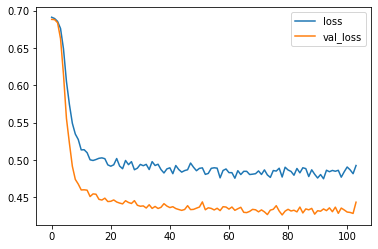

In [28]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
NNpredictions = model.predict_classes(X_test)
print(classification_report(y_test,NNpredictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1766
           1       0.94      0.74      0.83      1840

    accuracy                           0.85      3606
   macro avg       0.86      0.85      0.84      3606
weighted avg       0.86      0.85      0.84      3606



In [34]:
from sklearn.metrics import accuracy_score
accuracy={}
accuracy ['Neural Network1']=accuracy_score(y_test,NNpredictions)
accuracy

{'Neural Network1': 0.8455352190793123}

In [35]:
#MODEL 2 - USING MLPClassifier - 10,3 - 0.83

In [36]:
#MODEL3 - MLP with 19,10 - 55%

In [37]:
#MODEL4 - Final Model

In [49]:
model = Sequential()

model.add(Dense(10,activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
#Binary Classification
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [50]:
model.fit(x = X_train,y= y_train,epochs = 500,validation_data = (X_test,y_test),callbacks = [early_stop])

Train on 8414 samples, validate on 3606 samples
Epoch 1/500
8414/8414 [==============================] - 2s 213us/sample - loss: 0.6948 - val_loss: 0.6912
Epoch 2/500
8414/8414 [==============================] - 1s 67us/sample - loss: 0.6872 - val_loss: 0.6862
Epoch 3/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.6793 - val_loss: 0.6770
Epoch 4/500
8414/8414 [==============================] - 1s 67us/sample - loss: 0.6700 - val_loss: 0.6665
Epoch 5/500
8414/8414 [==============================] - 1s 67us/sample - loss: 0.6591 - val_loss: 0.6547
Epoch 6/500
8414/8414 [==============================] - 1s 67us/sample - loss: 0.6466 - val_loss: 0.6424
Epoch 7/500
8414/8414 [==============================] - 1s 68us/sample - loss: 0.6333 - val_loss: 0.6300
Epoch 8/500
8414/8414 [==============================] - 1s 67us/sample - loss: 0.6195 - val_loss: 0.6143
Epoch 9/500
8414/8414 [==============================] - 1s 69us/sample - loss: 0.6062 - val_loss: 0.60

8414/8414 [==============================] - 1s 66us/sample - loss: 0.4068 - val_loss: 0.4050
Epoch 78/500
8414/8414 [==============================] - 1s 70us/sample - loss: 0.4063 - val_loss: 0.4035
Epoch 79/500
8414/8414 [==============================] - 1s 64us/sample - loss: 0.4059 - val_loss: 0.4073
Epoch 80/500
8414/8414 [==============================] - 1s 64us/sample - loss: 0.4068 - val_loss: 0.4049
Epoch 81/500
8414/8414 [==============================] - 1s 75us/sample - loss: 0.4062 - val_loss: 0.4024
Epoch 82/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.4060 - val_loss: 0.4058
Epoch 83/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.4047 - val_loss: 0.4035
Epoch 84/500
8414/8414 [==============================] - 1s 65us/sample - loss: 0.4055 - val_loss: 0.4037
Epoch 85/500
8414/8414 [==============================] - 1s 64us/sample - loss: 0.4038 - val_loss: 0.4020
Epoch 86/500
8414/8414 [==========================

8414/8414 [==============================] - 1s 63us/sample - loss: 0.3903 - val_loss: 0.3882
Epoch 154/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3899 - val_loss: 0.3881
Epoch 155/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3906 - val_loss: 0.3913
Epoch 156/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3895 - val_loss: 0.4007
Epoch 157/500
8414/8414 [==============================] - 1s 62us/sample - loss: 0.3894 - val_loss: 0.3878
Epoch 158/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3907 - val_loss: 0.3886
Epoch 159/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3888 - val_loss: 0.3870
Epoch 160/500
8414/8414 [==============================] - 1s 62us/sample - loss: 0.3892 - val_loss: 0.3899
Epoch 161/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3897 - val_loss: 0.3891
Epoch 162/500
8414/8414 [=================

Epoch 229/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.3856 - val_loss: 0.3834
Epoch 230/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.3847 - val_loss: 0.3834
Epoch 231/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.3862 - val_loss: 0.3824
Epoch 232/500
8414/8414 [==============================] - 1s 68us/sample - loss: 0.3847 - val_loss: 0.3835
Epoch 233/500
8414/8414 [==============================] - 1s 69us/sample - loss: 0.3842 - val_loss: 0.3916
Epoch 234/500
8414/8414 [==============================] - 1s 65us/sample - loss: 0.3855 - val_loss: 0.3854
Epoch 235/500
8414/8414 [==============================] - 1s 67us/sample - loss: 0.3841 - val_loss: 0.3948
Epoch 236/500
8414/8414 [==============================] - 1s 66us/sample - loss: 0.3851 - val_loss: 0.3819
Epoch 237/500
8414/8414 [==============================] - 1s 84us/sample - loss: 0.3854 - val_loss: 0.3808
Epoch 238/500
8414/8414 [===

Epoch 305/500
8414/8414 [==============================] - 1s 65us/sample - loss: 0.3823 - val_loss: 0.3797
Epoch 306/500
8414/8414 [==============================] - 1s 65us/sample - loss: 0.3825 - val_loss: 0.3796
Epoch 307/500
8414/8414 [==============================] - 1s 64us/sample - loss: 0.3825 - val_loss: 0.3844
Epoch 308/500
8414/8414 [==============================] - 1s 73us/sample - loss: 0.3839 - val_loss: 0.3798
Epoch 309/500
8414/8414 [==============================] - 1s 65us/sample - loss: 0.3828 - val_loss: 0.3814
Epoch 310/500
8414/8414 [==============================] - 1s 64us/sample - loss: 0.3812 - val_loss: 0.3812
Epoch 311/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3813 - val_loss: 0.3796
Epoch 312/500
8414/8414 [==============================] - 1s 63us/sample - loss: 0.3825 - val_loss: 0.3867
Epoch 313/500
8414/8414 [==============================] - 1s 64us/sample - loss: 0.3821 - val_loss: 0.3787
Epoch 314/500
8414/8414 [===

In [51]:
NN_model4_predictions = model.predict_classes(X_test)
accuracy ['Neural Network model4']=accuracy_score(y_test,NN_model4_predictions)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy

{'Neural Network1': 0.8455352190793123,
 'Neural Network model4': 0.8624514697726012}

## Metrics

In [52]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

In [53]:
cf = confusion_matrix(y_test,NN_model4_predictions)
print(cf)

[[1672   94]
 [ 402 1438]]


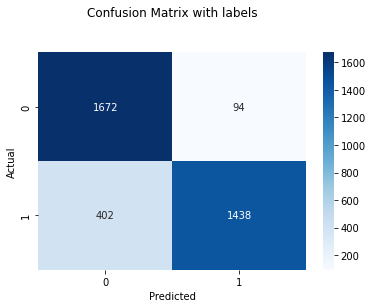

In [54]:
ax = sns.heatmap(cf, annot=True, fmt='g',cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
plt.show()